In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
# The path to our CSV file
spotify_data = Path("Resources/spotify-2023.csv")

# Read our spotify data into pandas
spotify_df = pd.read_csv(spotify_data, encoding='ISO-8859-1')
spotify_df.head(10)


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,148,F,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,100,F,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,170,D,Minor,81,56,48,21,0,8,33


In [3]:
#get info

spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [4]:
#cleanup empy cells
filtered_df=spotify_df[spotify_df["key"].isna()]
filtered_df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
12,Flowers,Miley Cyrus,1,2023,1,12,12211,115,1316855716,300,...,118,NaN,Major,71,65,68,6,0,3,7
17,What Was I Made For? [From The Motion Picture ...,Billie Eilish,1,2023,7,13,873,104,30546883,80,...,78,NaN,Major,44,14,9,96,0,10,3
22,I Wanna Be Yours,Arctic Monkeys,1,2013,1,1,12859,110,1297026226,24,...,135,NaN,Minor,48,44,42,12,2,11,3
35,Los del Espacio,"Big One, Duki, Lit Killah, Maria Becerra, FMK,...",8,2023,6,1,1150,31,123122413,22,...,120,NaN,Major,81,63,68,11,0,11,4
44,Barbie World (with Aqua) [From Barbie The Album],"Nicki Minaj, Aqua, Ice Spice",3,2023,6,23,1117,80,65156199,82,...,144,NaN,Major,77,75,58,52,0,23,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,Hold Me Closer,"Elton John, Britney Spears",2,2017,11,10,4967,0,284216603,165,...,126,NaN,Major,67,49,77,11,0,19,11
901,After LIKE,IVE,1,2022,8,22,767,12,265548837,20,...,125,NaN,Major,68,80,92,10,0,9,12
903,B.O.T.A. (Baddest Of Them All) - Edit,"Interplanetary Criminal, Eliza Rose",2,2022,6,15,5153,6,244585109,102,...,137,NaN,Major,74,71,89,24,61,15,5
938,Labyrinth,Taylor Swift,1,2022,10,21,1597,0,187339835,6,...,110,NaN,Major,48,15,31,80,22,12,4


In [5]:
spotify_filled_df = spotify_df.fillna("NaN")
spotify_filled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      953 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   953 non-null    ob

In [6]:
# Calculate the total number of unique artists

spotify_filled_df["artist(s)_name"].nunique()

645

In [7]:
# Calculate the total number of unique songs
spotify_filled_df["track_name"].nunique()

943

In [8]:
# checking for dupicated track + Artist
duplicates = spotify_filled_df[spotify_filled_df.duplicated(subset=["track_name","artist(s)_name"],keep=False)]["track_name"].unique()
print(duplicates)

#duplicates = spotify_filled_df.track_name.duplicated()
#print(duplicates)

['SNAP' 'SPIT IN MY FACE!' 'About Damn Time' 'Take My Breath']


In [9]:
#getting all the data for duplicated dupicated track + Artist

duplicates_df = spotify_filled_df.loc[spotify_filled_df["track_name"].isin(duplicates)]
duplicates_df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
178,SNAP,Rosa Linn,1,2022,3,19,3202,18,726307468,148,...,170,NaN,Major,56,53,64,11,0,45,6
345,SPIT IN MY FACE!,ThxSoMch,1,2022,10,31,629,14,303216294,32,...,94,G#,Major,73,65,79,5,2,11,6
372,About Damn Time,Lizzo,1,2022,7,15,2332,2,723894473,0,...,109,A#,Minor,84,72,74,10,0,34,7
482,SPIT IN MY FACE!,ThxSoMch,1,2022,10,31,573,0,301869854,1,...,166,C#,Major,70,57,57,9,20,11,7
512,Take My Breath,The Weeknd,1,2021,8,6,2597,0,130655803,17,...,121,A#,Minor,70,35,77,1,0,26,4
616,Take My Breath,The Weeknd,1,2021,8,6,6392,0,432702334,174,...,121,G#,Major,75,53,74,2,0,11,5
764,About Damn Time,Lizzo,1,2022,4,14,9021,0,723894473,242,...,109,A#,Minor,84,72,74,10,0,34,7
873,SNAP,Rosa Linn,1,2022,3,19,1818,0,711366595,3,...,170,NaN,Major,56,52,64,11,0,45,7


In [10]:
# sorting 

duplicates_sorted = duplicates_df.sort_values("track_name")
duplicates_sorted

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
372,About Damn Time,Lizzo,1,2022,7,15,2332,2,723894473,0,...,109,A#,Minor,84,72,74,10,0,34,7
764,About Damn Time,Lizzo,1,2022,4,14,9021,0,723894473,242,...,109,A#,Minor,84,72,74,10,0,34,7
178,SNAP,Rosa Linn,1,2022,3,19,3202,18,726307468,148,...,170,NaN,Major,56,53,64,11,0,45,6
873,SNAP,Rosa Linn,1,2022,3,19,1818,0,711366595,3,...,170,NaN,Major,56,52,64,11,0,45,7
345,SPIT IN MY FACE!,ThxSoMch,1,2022,10,31,629,14,303216294,32,...,94,G#,Major,73,65,79,5,2,11,6
482,SPIT IN MY FACE!,ThxSoMch,1,2022,10,31,573,0,301869854,1,...,166,C#,Major,70,57,57,9,20,11,7
512,Take My Breath,The Weeknd,1,2021,8,6,2597,0,130655803,17,...,121,A#,Minor,70,35,77,1,0,26,4
616,Take My Breath,The Weeknd,1,2021,8,6,6392,0,432702334,174,...,121,G#,Major,75,53,74,2,0,11,5


In [11]:
spotify_filled_df.index

RangeIndex(start=0, stop=953, step=1)

In [12]:
#removing duplicates from the data frame 

#cleaned_spotify_df = spotify_filled_df.drop([873,482,764,512],axis=0,inplace=True)
cleaned_spotify_df = spotify_filled_df.drop([512, 764, 482, 873, 574])


In [13]:
#checking if we removed all the duplicates
duplicates1 = cleaned_spotify_df[cleaned_spotify_df.duplicated(subset=["track_name","artist(s)_name"],keep=False)]["track_name"].unique()
print(duplicates1)

[]


In [14]:
cleaned_spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 948 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            948 non-null    object
 1   artist(s)_name        948 non-null    object
 2   artist_count          948 non-null    int64 
 3   released_year         948 non-null    int64 
 4   released_month        948 non-null    int64 
 5   released_day          948 non-null    int64 
 6   in_spotify_playlists  948 non-null    int64 
 7   in_spotify_charts     948 non-null    int64 
 8   streams               948 non-null    object
 9   in_apple_playlists    948 non-null    int64 
 10  in_apple_charts       948 non-null    int64 
 11  in_deezer_playlists   948 non-null    object
 12  in_deezer_charts      948 non-null    int64 
 13  in_shazam_charts      948 non-null    object
 14  bpm                   948 non-null    int64 
 15  key                   948 non-null    object


In [15]:
#changing the type of columnt streams to int64
cleaned_spotify_df['streams'] = cleaned_spotify_df['streams'].astype('int64')
cleaned_spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 948 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            948 non-null    object
 1   artist(s)_name        948 non-null    object
 2   artist_count          948 non-null    int64 
 3   released_year         948 non-null    int64 
 4   released_month        948 non-null    int64 
 5   released_day          948 non-null    int64 
 6   in_spotify_playlists  948 non-null    int64 
 7   in_spotify_charts     948 non-null    int64 
 8   streams               948 non-null    int64 
 9   in_apple_playlists    948 non-null    int64 
 10  in_apple_charts       948 non-null    int64 
 11  in_deezer_playlists   948 non-null    object
 12  in_deezer_charts      948 non-null    int64 
 13  in_shazam_charts      948 non-null    object
 14  bpm                   948 non-null    int64 
 15  key                   948 non-null    object


In [16]:
top_songs_df = cleaned_spotify_df.sort_values(by="streams", ascending=False).head(25)
top_songs_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,...,171,C#,Major,50,38,80,0,0,9,7
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3562543890,33,...,96,C#,Minor,83,93,65,58,0,9,8
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2887241814,440,...,110,C#,Major,50,45,41,75,0,11,3
620,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2864791672,533,...,98,F#,Minor,82,54,59,69,0,18,10
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2808096550,372,...,90,D,Major,76,91,50,54,0,7,5


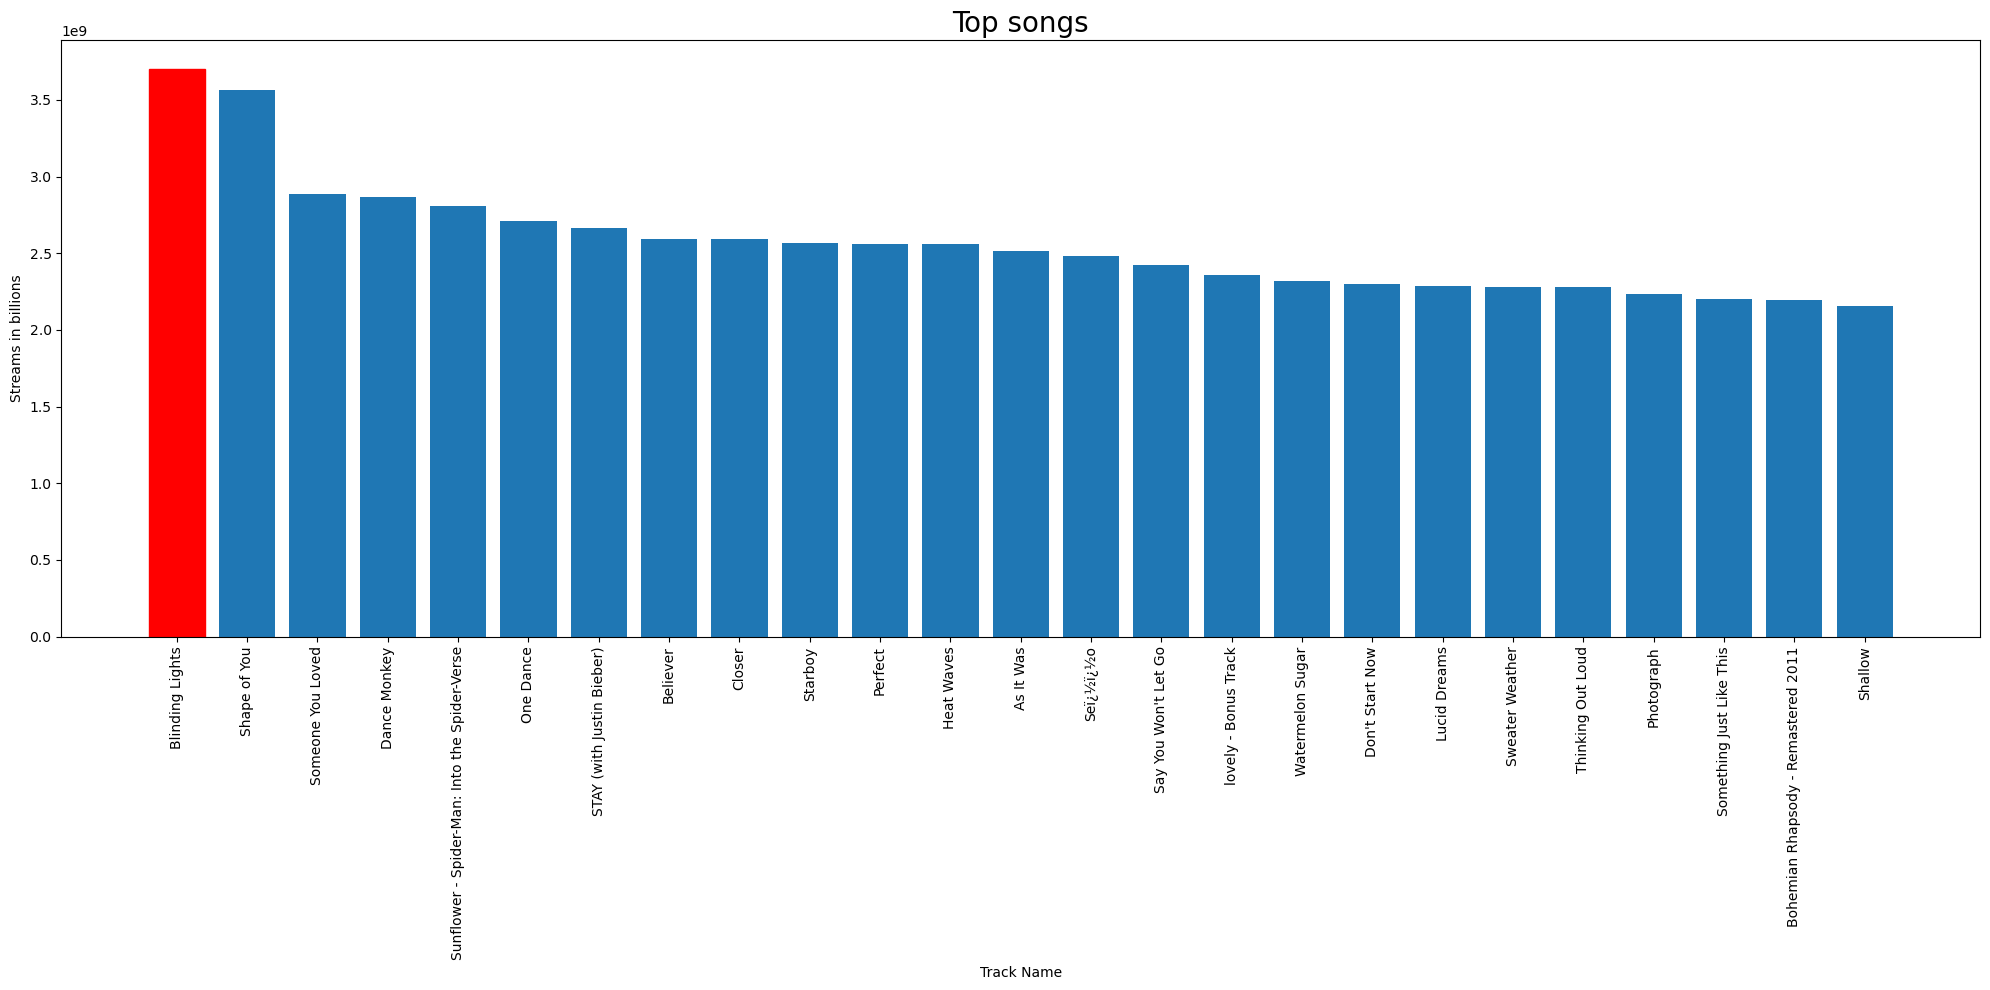

In [17]:
#charting the top 25 of all streams in 2023

x_axis = top_songs_df["track_name"]
y_axis = top_songs_df["streams"]
plt.figure(figsize=(20,10))
bars = plt.bar(x_axis, y_axis)
bars[0].set_color("red")
plt.xticks(rotation=90, ha="center")

#adding labels and title for clarity
plt.title("Top songs", fontsize=20)
plt.xlabel('Track Name')
plt.ylabel('Streams in billions')
plt.tight_layout()
plt.savefig("output_data/top_songs_streams.png")
plt.show()


In [18]:
artist_df = pd.DataFrame(spotify_filled_df['artist(s)_name'])
artist_df.head()

,artist(s)_name
0,"Latto, Jung Kook"
1,Myke Towers
2,Olivia Rodrigo
3,Taylor Swift
4,Bad Bunny


In [19]:
f = artist_df['artist(s)_name'].str.split(',', expand=True)
f.head(10)

,0,1,2,3,4,5,6,7
0,Latto,Jung Kook,None,None,None,None,None,None
1,Myke Towers,None,None,None,None,None,None,None
2,Olivia Rodrigo,None,None,None,None,None,None,None
3,Taylor Swift,None,None,None,None,None,None,None
4,Bad Bunny,None,None,None,None,None,None,None
5,Dave,Central Cee,None,None,None,None,None,None
6,Eslabon Armado,Peso Pluma,None,None,None,None,None,None
7,Quevedo,None,None,None,None,None,None,None
8,Gunna,None,None,None,None,None,None,None
9,Peso Pluma,Yng Lvcas,None,None,None,None,None,None


In [20]:
# extracting the artist name from each column
artist_counts = {}
for col in f.columns:
    artist = col
    if artist in artist_counts:
        artist_counts[artist] += 1
    else:
        artist_counts[artist] = 1
# extracting the artist name from each row
for index, row in f.iterrows():
    artist = row[0]
    if artist in artist_counts:
        artist_counts[artist] += 1
    else:
        artist_counts[artist] = 1


#print(artist_counts)
#for artist, count in artist_counts.items():
    #print(f"{artist}: {count}")

top_artists_df = pd.DataFrame(list(artist_counts.items()), columns=['Artist', 'Count'])
top_artists_df = top_artists_df.sort_values(by="Count",ascending=False).head(10) 
top_artists_df

,Artist,Count
11,Taylor Swift,36
30,The Weeknd,34
12,Bad Bunny,26
22,SZA,23
88,Kendrick Lamar,23
115,Drake,19
21,Harry Styles,17
25,Feid,15
103,Ed Sheeran,13
34,Morgan Wallen,12


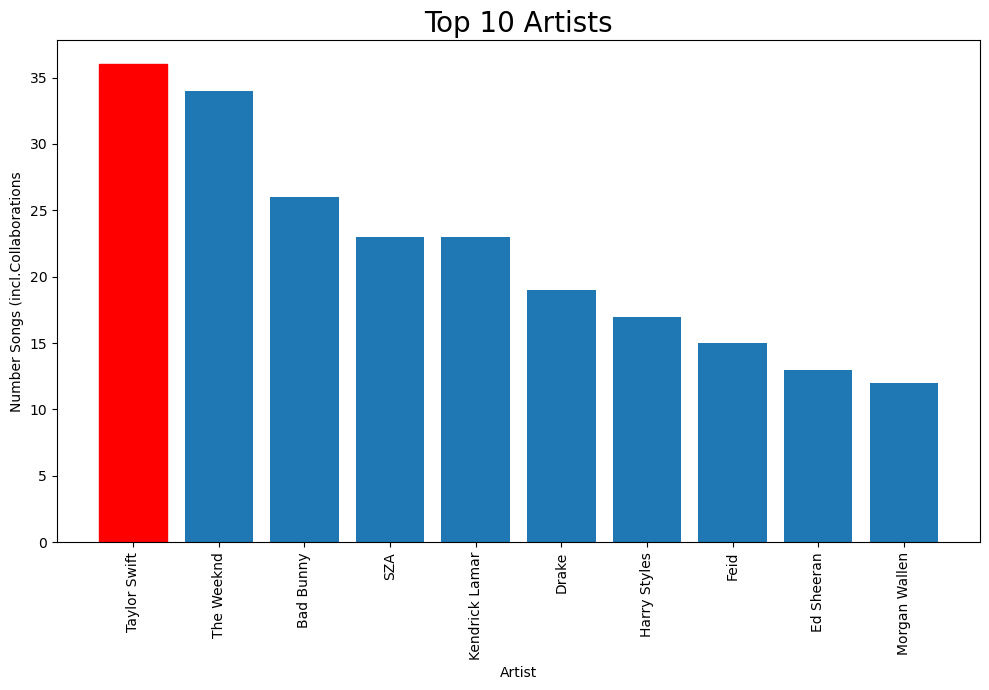

In [23]:
#charting the top 10 best / most prolific artist of all streams in 2023

x_axis = top_artists_df["Artist"]
y_axis = top_artists_df["Count"]
plt.figure(figsize=(10,7))
bars = plt.bar(x_axis, y_axis)
bars[0].set_color("red")
plt.xticks(rotation=90, ha="center")

#adding labels and title for clarity
plt.title("Top 10 Artists", fontsize=20)
plt.xlabel('Artist')
plt.ylabel('Number Songs (incl.Collaborations')
plt.tight_layout()
plt.savefig("output_data/top_artists.png")
plt.show()

In [82]:
leading_artists_by_track = cleaned_spotify_df["artist(s)_name"].value_counts().head(10)
leading_artists_by_track

artist(s)_name
Taylor Swift        34
The Weeknd          21
SZA                 19
Bad Bunny           19
Harry Styles        17
Kendrick Lamar      12
Morgan Wallen       11
Ed Sheeran           9
Feid                 8
Drake, 21 Savage     8
Name: count, dtype: int64

In [37]:
# most popular artist based on number of streams

grouped_by_artist = pd.DataFrame(cleaned_spotify_df.groupby("artist(s)_name")["streams"].sum())
grouped_by_artist
top_artists = grouped_by_artist.sort_values(by="streams", ascending=False).head(10)
top_artists

,streams
artist(s)_name,
The Weeknd,14054897067
Taylor Swift,14053658300
Ed Sheeran,13908947204
Harry Styles,11608645649
Bad Bunny,9997799607
Olivia Rodrigo,7442148916
Eminem,6183805596
Bruno Mars,5846920599
Arctic Monkeys,5569806731


<Figure size 1000x600 with 0 Axes>

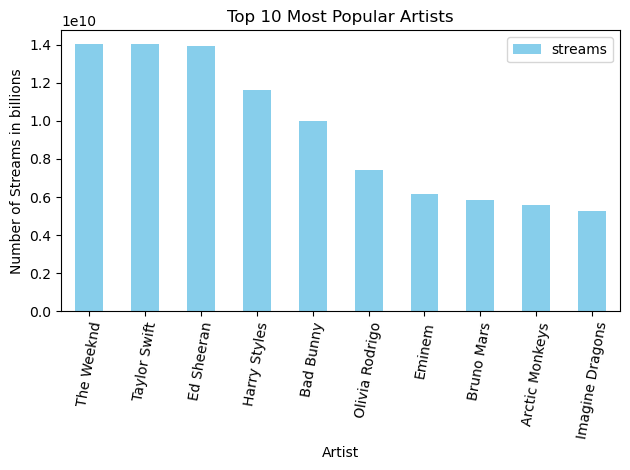

In [55]:
# Plot the top 10 artists
plt.figure(figsize=(10, 6))
top_artists.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Popular Artists')
plt.xlabel('Artist')
plt.ylabel('Number of Streams in billions')
plt.xticks(rotation=80)
plt.tight_layout()
plt.savefig("output_data/top_artists_streams.png")
plt.show()

artist(s)_name
Taylor Swift        34
The Weeknd          21
SZA                 19
Bad Bunny           19
Harry Styles        17
Kendrick Lamar      12
Morgan Wallen       11
Ed Sheeran           9
Feid                 8
Drake, 21 Savage     8
Name: count, dtype: int64

The r-value is:-0.14660886931588374


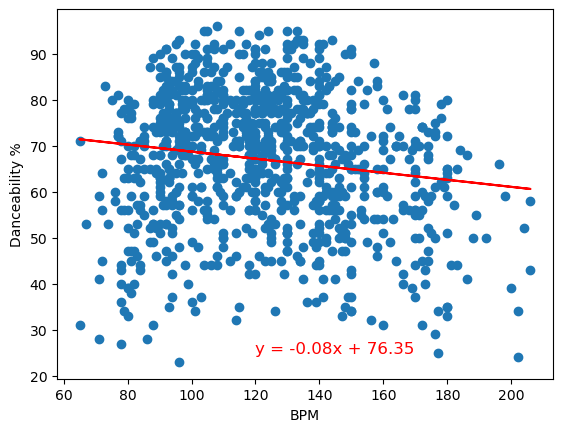

In [114]:
x_values = cleaned_spotify_df['bpm']
y_values = cleaned_spotify_df['danceability_%']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(120,25),fontsize=12,color="red")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('BPM')
plt.ylabel('Danceability %')
print(f"The r-value is:{rvalue}")
plt.savefig("output_data/danceability_vs_BPM.png")
plt.show()

The r-value is:-0.0023050669108387574


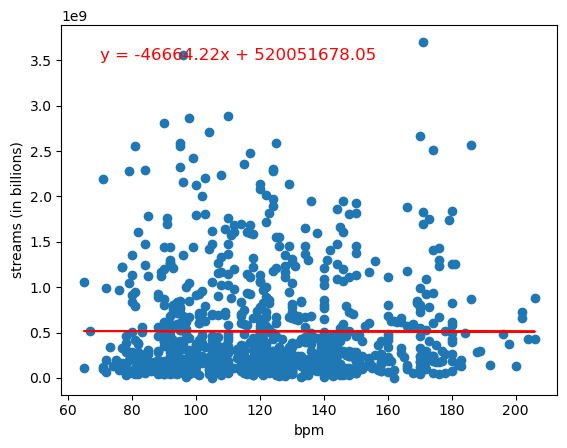

In [115]:
# streams vs. bpm
x_values = cleaned_spotify_df['bpm']
y_values = cleaned_spotify_df['streams']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(70, 3500000000),fontsize=12,color="red")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('bpm')
plt.ylabel('streams (in billions)')
print(f"The r-value is:{rvalue}")
plt.savefig("output_data/streams_vs_BPM.png")
plt.show()

The r-value is:-0.10556527471495235


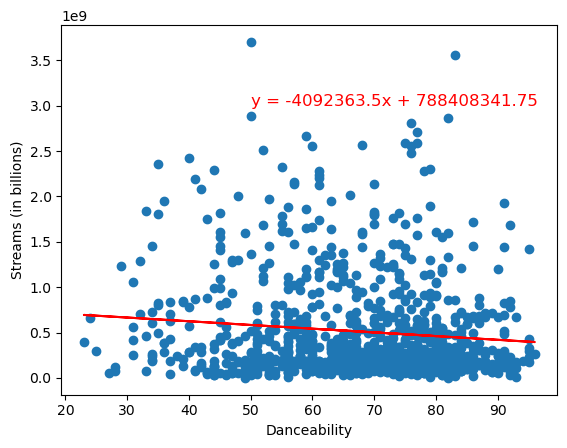

In [29]:
# streams vs. dancebility

x_values = cleaned_spotify_df['danceability_%']
y_values = cleaned_spotify_df['streams']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(50,3000000000),fontsize=12,color="red")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Danceability')
plt.ylabel('Streams (in billions)')
print(f"The r-value is:{rvalue}")
plt.savefig("output_data/streams_vs_danceability.png")
plt.show()

The r-value is:-0.1127510835731849


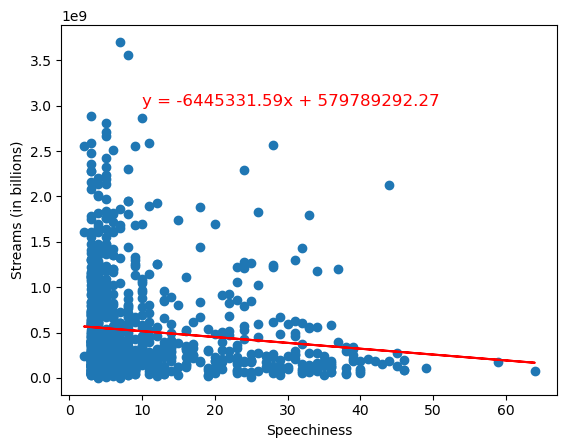

In [28]:
# streams vs. speechiness

x_values = cleaned_spotify_df['speechiness_%']
y_values = cleaned_spotify_df['streams']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(10,3000000000),fontsize=12,color="red")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Speechiness')
plt.ylabel('Streams (in billions)')
print(f"The r-value is:{rvalue}")
plt.savefig("output_data/streams_vs_speechiness.png")
plt.show()

In [78]:
#What percent is major compared to minor? (Pie chart)

mode = cleaned_spotify_df["mode"].value_counts()
mode

mode
Major    547
Minor    401
Name: count, dtype: int64

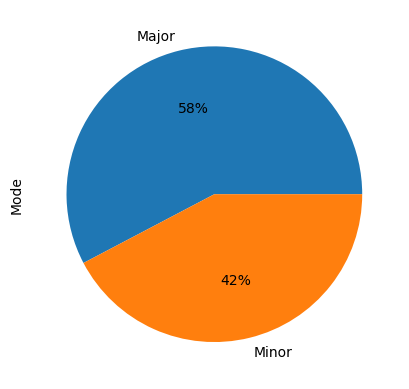

In [117]:
# chart major vs. minor scales

figure_mode = mode.plot(kind="pie", y= mode, autopct="%1.0f%%")
figure_mode.set_ylabel("Mode")
plt.savefig("output_data/major_vs_minor.png")
plt.show()

In [87]:
# most popular song
for index, row in top_songs_df.head(10).iterrows():
    print(f"The most successful song is {row['track_name']} by {row['artist(s)_name']} in {row['mode']} mode")
    print("-" * 20)

The most successful song is Blinding Lights by The Weeknd in Major mode
--------------------
The most successful song is Shape of You by Ed Sheeran in Minor mode
--------------------
The most successful song is Someone You Loved by Lewis Capaldi in Major mode
--------------------
The most successful song is Dance Monkey by Tones and I in Minor mode
--------------------
The most successful song is Sunflower - Spider-Man: Into the Spider-Verse by Post Malone, Swae Lee in Major mode
--------------------
The most successful song is One Dance by Drake, WizKid, Kyla in Major mode
--------------------
The most successful song is STAY (with Justin Bieber) by Justin Bieber, The Kid Laroi in Major mode
--------------------
The most successful song is Believer by Imagine Dragons in Minor mode
--------------------
The most successful song is Closer by The Chainsmokers, Halsey in Major mode
--------------------
The most successful song is Starboy by The Weeknd, Daft Punk in Major mode
-------------

In [86]:
# streaming platforms

platform_df = cleaned_spotify_df[['in_spotify_charts','in_apple_charts', 'in_deezer_charts','in_shazam_charts']].copy()
platform_df.head(50)


,in_spotify_charts,in_apple_charts,in_deezer_charts,in_shazam_charts
0,147,263,10,826
1,48,126,14,382
2,113,207,14,949
3,100,207,12,548
4,50,133,15,425
5,91,213,17,946
6,50,222,13,418
7,43,89,13,194
8,83,210,11,953
9,44,110,13,339


In [81]:
platform_df = platform_df.rename(columns = {'in_spotify_charts':'Spotify','in_apple_charts':'Apple','in_deezer_charts':'Deezer','in_shazam_charts':'Shazam'})
#platform_df.head()
platform_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 948 entries, 0 to 952
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Spotify  948 non-null    int64 
 1   Apple    948 non-null    int64 
 2   Deezer   948 non-null    int64 
 3   Shazam   948 non-null    object
dtypes: int64(3), object(1)
memory usage: 37.0+ KB


In [88]:
#filling up NAN with 0
platform_df.fillna(0, inplace=True)
platform_df.head(50)
#platform_df['Shazam'] = platform_df['Shazam'].astype('int64')

,in_spotify_charts,in_apple_charts,in_deezer_charts,in_shazam_charts
0,147,263,10,826
1,48,126,14,382
2,113,207,14,949
3,100,207,12,548
4,50,133,15,425
5,91,213,17,946
6,50,222,13,418
7,43,89,13,194
8,83,210,11,953
9,44,110,13,339


In [79]:
platforms_summed = pd.DataFrame(platform_df.sum())
platforms_summed

,0
Spotify,11445
Apple,49340
Deezer,2520
Shazam,"8263829495484259464181949533392511681,0211,281..."


In [77]:
#calculating streams per platform
spotify_streams = platform_df['Spotify'].sum()
apple_streams = platform_df['Apple'].sum()
deezer_streams = platform_df['Deezer'].sum()
shazam_streams = platform_df['Shazam'].sum()

In [69]:
print(shazam_streams)

8263829495484259464181949533392511681,0211,281NaN18701,173187290150731391,09316896211325029419727310354184212818210062697273111,133102332259140161108101760NaNNaN615210216215167370171160272529265169NaN230NaN1760841541949301157280323NaN491,4511,1704291628210047802362007852664862043420231232153519458481840666149258820344746386471230NaN1368814822368221189176520931666602081285581951393605037205634153NaNNaN15454264020028512916258004426131174720100NaN3080263116573937001117166119167099510100313317302619171109423369067534880361314024056113612929234344182110249540NaN43823911033178454311504992902046320550335540520037NaN464185516038137304309270201055105101246133630782158281011752904441485022NaN16610131810039009211650661910315082304804702112177341907610043804110265520221002318200599451301524119212413NaN08NaN2110253020NaN131335804NaN523200154001111202002582NaN001060NaN0168100NaNNaNNaNNaNNaN0NaN10NaN0000000000000000004600000000092000001100000003610021NaNNaN36NaN11NaNNaN0001NaN00120NaNNaNNaN0004175400